In [48]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 生成测试数据集

In [49]:
# 定义数据集合
X = np.arange(0,10,0.1, dtype=np.float32)
Y = 2*X + 2*np.random.random(100)

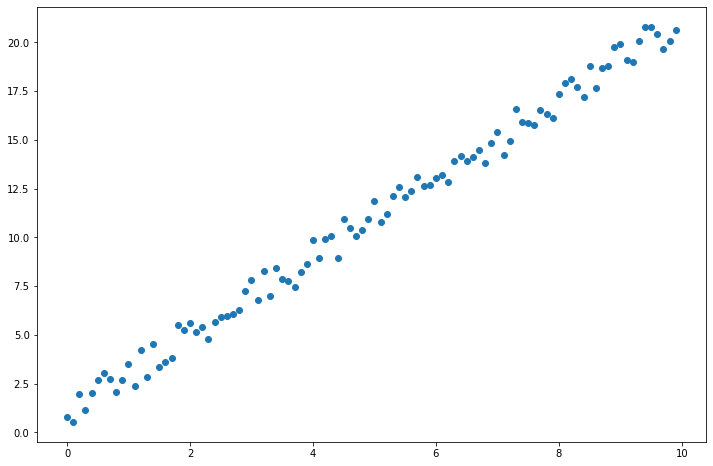

In [50]:
# 可视化数据集
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

ax.scatter(X,Y)

fig.show()

## 定义我们的模型

In [57]:
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

def forward(x):
    return w * x

## 定义损失函数

In [58]:
loss = torch.nn.MSELoss() # 定义均方损失函数

In [59]:
# 损失函数的例子
x_sample = torch.tensor([1,0], dtype=torch.float32)
y_sample = torch.tensor([1,1], dtype=torch.float32)

l = loss(x_sample, y_sample)
print(l)

tensor(0.5000)


## 定义优化器

我们在这里定义一个SGD优化器,     

```python
optimizer = torch.optim.SGD([w], lr=learning_rate)
```

其中:
- w表示我们要更新的参数(网络的权重)
- lr表示学习率

在Pytorch中, 还optimizer还提供可以一次更新全部的参数, 和参数梯度清零两个功能.

- ` optimizer.step()`: 对神经网络(复合函数)的相关变量进行更新, 即所有参数值向梯度相反方向走一步;
-  `optimizer.zero_grad()`: 对神经网络(复合函数)的相关系数进行梯度的清空;

In [60]:
# 定义一个SGD优化器
learning_rate = 0.001
optimizer = torch.optim.SGD([w], lr=learning_rate)

## 更新权重

In [61]:
X_tensor = torch.from_numpy(X)
Y_tensor = torch.from_numpy(Y)

n_iters = 100
for epoch in range(n_iters):
    y_pred = forward(X_tensor)
    l = loss(Y_tensor, y_pred) # 求误差(注意这里的顺序)
    l.backward() # 求梯度
    optimizer.step()  # 更新权重，即向梯度方向走一步
    optimizer.zero_grad() # 清空梯度

    if epoch % 20 == 0:
        print(f'epoch {epoch+1}: w = {w.item():.3f}, loss = {l.item():.3f}')

print(f'根据训练模型预测, 当x=5时, y的值为： {forward(5):.3f}')

epoch 1: w = 0.142, loss = 153.912
epoch 21: w = 1.642, loss = 10.674
epoch 41: w = 2.028, loss = 1.210
epoch 61: w = 2.127, loss = 0.585
epoch 81: w = 2.152, loss = 0.544
根据训练模型预测, 当x=5时, y的值为： 10.794


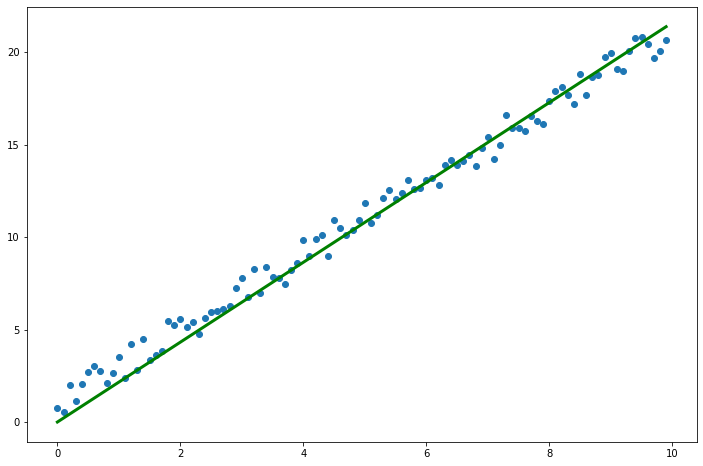

In [62]:
# 绘制预测曲线
y_pre = forward(X_tensor).detach().numpy()

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

ax.scatter(X,Y)
ax.plot(X, y_pre, 'g-',  lw=3)

fig.show()